<a href="https://colab.research.google.com/github/Lucywang0316/dicussion6/blob/main/kaggle_restaurant.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Project Title: **Assessing North America Fast Food Restaurant Wendy's**

Overview: Our project focuses on North America restaurants featuring a rich selection of dining establishments from cozy local eateries to renowned culinary destinations, and combined with Wendy's restaurant dataset that shows restaurant features and address. We also found another fast food restaurant dataset that includes Wendy's by different location, and combining it with our wendy's dataset to see different features in different store location.


Group member: Mengdong Liang, Runtian Jiang, Lucy Wang

In [ ]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = '1500-north-american-resturants:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F4435273%2F7615817%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240217%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240217T152148Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D79c02d6c130e43709da68e4efe32a3e4d98d7c6d08c9241e88603aff3b9d052c5af62d15e5ed8e6869b6aa181f3227600dd771016419b230c8209b6c07757035f5679c184b455803181b93531a7d2415688ac8494de9110e791adc341dece4b887dcf4bc09bc93ccbf8a50f2106bd2250fef03f229c1dc6c89649988df998e90c319ac2b81cf0c4603365d609f946270fbdeb27f8cc6ce8ce1d1ee106355555aeec0f7c401315d012305162c6effb776465ec8a098c85d09070132b2e8d5a5d9ee831c16b82ed05cb7383fba4f39ea2bf807fefd0df0a77e59d86b0b17b5213ecf06422d61e1e61c9f9ac95369b39208056c15d29dd23e489ae0ef6ecc95fae7'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 55413 bytes downloaded
Downloaded and uncompressed: 1500-north-american-resturants
Data source import complete.


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/1500-north-american-resturants/North America Restaurants.csv


In [ ]:
North_america_data=pd.read_csv("/kaggle/input/1500-north-american-resturants/North America Restaurants.csv")

In [ ]:
wendys_northamerica=North_america_data[North_america_data['name'].str.contains("Wendy", case=False, na=False)]
wendys_northamerica

,name,city,state,zipcode,country,cuisines,pickup_enabled,delivery_enabled,weighted_rating_value,aggregated_rating_count
232,Wendy's,Orangeburg,SC,29115,US,"American, Burgers, Fast Food",True,True,2.4,23
1046,Wendy's,Reading,PA,19607,US,"American, Breakfast, Burgers, Chicken, Dinner,...",True,True,2.3,286
1112,Wendy's,Anchorage,AK,99503,US,"American, Breakfast, Burgers, Chicken, Dinner,...",True,True,3.2,376
1130,Wendy's,Rochester,NY,14626,US,"American, Breakfast, Burgers, Chicken, Dinner,...",True,True,3.4,40
1223,Wendy's,Overland Park,KS,66211,US,"American, Burgers, Fast Food",True,True,3.6,27
1478,Wendy's,Philadelphia,PA,19121,US,"American, Breakfast, Burgers, Chicken, Dinner,...",True,True,2.4,924


In [ ]:
North_america_data.shape

(1500, 10)

In [ ]:
wendys=pd.read_csv("wendys_restaurants.csv")

In [ ]:
wendys.columns

Index(['storeId', 'name', 'address1', 'address2', 'zipcode', 'country',
       'phone', 'currency', 'hasBreakfast', 'hasCokeFreestyle', 'hasCSO',
       'hasDigitalCoupon', 'hasHola', 'hasLoyalty', 'hasMCX', 'hasMobileOrder',
       'hasMobilePay', 'hasWifi', 'isOpenLate', 'latitude', 'longitude'],
      dtype='object')

In [ ]:
merged_wendys=pd.merge(wendys_northamerica,wendys,on='zipcode',how='inner')

In [ ]:
merged_wendys.describe()

,weighted_rating_value,aggregated_rating_count,storeId,phone,latitude,longitude
count,6.000000,6.000000,6.00000,6.000000e+00,6.000000,6.000000
mean,2.883333,279.333333,2508.50000,6.725872e+09,42.853086,-92.361869
std,0.581091,349.755152,1729.03797,2.649060e+09,9.531670,29.068107
min,2.300000,23.000000,538.00000,2.152361e+09,33.490956,-149.867524
25%,2.400000,30.250000,987.75000,5.916130e+09,39.191578,-91.193364
50%,2.800000,163.000000,2647.50000,7.071558e+09,40.146725,-79.282372
75%,3.350000,353.500000,3684.75000,8.813279e+09,42.486979,-76.383517
max,3.600000,924.000000,4753.00000,9.134917e+09,61.193851,-75.158023


In [ ]:
merged_wendys.columns#access column names

Index(['name_x', 'city', 'state', 'zipcode', 'country_x', 'cuisines',
       'pickup_enabled', 'delivery_enabled', 'weighted_rating_value',
       'aggregated_rating_count', 'storeId', 'name_y', 'address1', 'address2',
       'country_y', 'phone', 'currency', 'hasBreakfast', 'hasCokeFreestyle',
       'hasCSO', 'hasDigitalCoupon', 'hasHola', 'hasLoyalty', 'hasMCX',
       'hasMobileOrder', 'hasMobilePay', 'hasWifi', 'isOpenLate', 'latitude',
       'longitude'],
      dtype='object')

In [ ]:
heatmap_data = merged_wendys.corr()

<ipython-input-22-a65861f7d081>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap_data = merged_wendys.corr()


Text(0.5, 1.0, 'Correlation Heatmap')

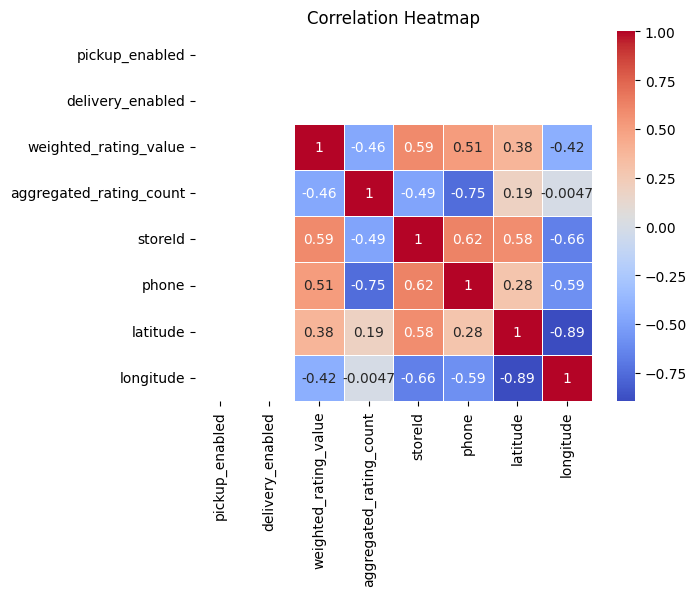

In [ ]:
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap')

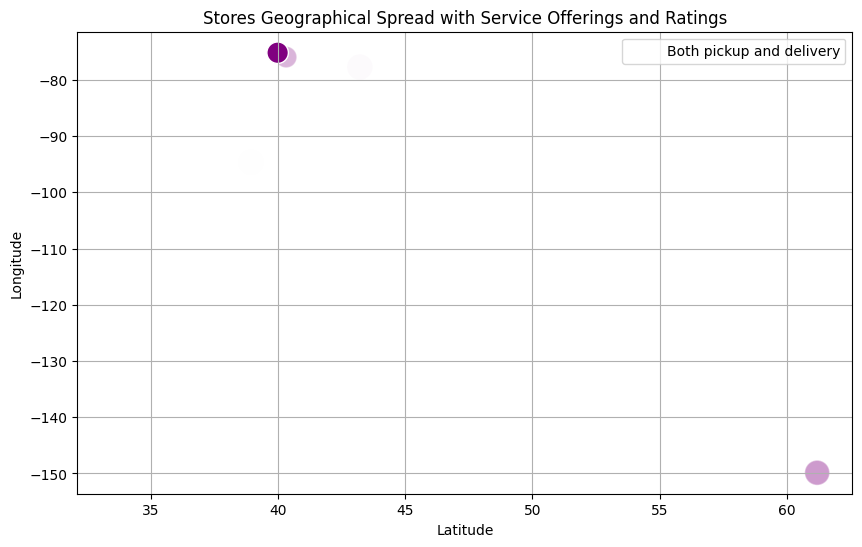

In [ ]:
plt.figure(figsize=(10, 6))

def get_sizes_and_alphas(subset_df):
    subset_bubble_size = subset_df['weighted_rating_value'] * 100
    subset_normalized_rating_count = (subset_df['aggregated_rating_count'] - subset_df['aggregated_rating_count'].min()) / (subset_df['aggregated_rating_count'].max() - subset_df['aggregated_rating_count'].min())
    return subset_bubble_size, subset_normalized_rating_count

# Separate the DataFrame into subsets based on pickup and delivery status
both_enabled = merged_wendys[(merged_wendys['pickup_enabled']) & (merged_wendys['delivery_enabled'])]
one_enabled = merged_wendys[(merged_wendys['pickup_enabled']) ^ (merged_wendys['delivery_enabled'])]
neither_enabled = merged_wendys[~(merged_wendys['pickup_enabled']) & ~(merged_wendys['delivery_enabled'])]

# Now, plot each subset separately, with its own sizes and alphas
for subset, color, label in zip([both_enabled, one_enabled, neither_enabled], ['purple', 'blue', 'grey'], ['Both pickup and delivery', 'Either pickup or delivery', 'Neither pickup nor delivery']):
    if not subset.empty:
        subset_bubble_size, subset_normalized_rating_count = get_sizes_and_alphas(subset)
        plt.scatter(subset['latitude'], subset['longitude'], s=subset_bubble_size, c=color, alpha=subset_normalized_rating_count, label=label, edgecolors='w')

plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Stores Geographical Spread with Service Offerings and Ratings')
plt.legend()
plt.grid(True)


In [ ]:
print(f"Both enabled: {len(both_enabled)}")
print(f"One enabled: {len(one_enabled)}")
print(f"Neither enabled: {len(neither_enabled)}")

Both enabled: 6
One enabled: 0
Neither enabled: 0


In [ ]:
fast_food_restaurant=pd.read_csv("/content/Datafiniti_Fast_Food_Restaurants_May19.csv")

In [ ]:
wendy_subset=fast_food_restaurant[fast_food_restaurant['name'].str.contains("Wendy", case=False, na=False)]

In [ ]:
wendy_combine=pd.merge(wendy_subset,wendys,left_on='postalCode',right_on="zipcode")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
wendy_combine.columns

Index(['id', 'dateAdded', 'dateUpdated', 'address', 'categories',
       'primaryCategories', 'city', 'country_x', 'keys', 'latitude_x',
       'longitude_x', 'name_x', 'postalCode', 'province', 'sourceURLs',
       'websites', 'storeId', 'name_y', 'address1', 'address2', 'zipcode',
       'country_y', 'phone', 'currency', 'hasBreakfast', 'hasCokeFreestyle',
       'hasCSO', 'hasDigitalCoupon', 'hasHola', 'hasLoyalty', 'hasMCX',
       'hasMobileOrder', 'hasMobilePay', 'hasWifi', 'isOpenLate', 'latitude_y',
       'longitude_y'],
      dtype='object')

In [ ]:
service_columns = ['hasBreakfast', 'hasCokeFreestyle', 'hasCSO', 'hasDigitalCoupon', 'hasHola', 'hasLoyalty', 'hasMCX', 'hasMobileOrder', 'hasMobilePay', 'hasWifi', 'isOpenLate']
wendy_combine[service_columns] = wendy_combine[service_columns].astype(int)
grouped_data = wendy_combine.groupby('province')[service_columns].sum()
grouped_data.head()


,hasBreakfast,hasCokeFreestyle,hasCSO,hasDigitalCoupon,hasHola,hasLoyalty,hasMCX,hasMobileOrder,hasMobilePay,hasWifi,isOpenLate
province,,,,,,,,,,,
AK,0,0,0,0,0,0,0,0,1,0,1
AL,2,8,0,0,0,0,0,0,10,6,9
AR,1,7,0,0,0,0,0,0,7,4,5
AZ,1,3,0,0,0,0,0,2,4,2,5
CA,2,5,0,0,0,0,0,0,9,1,10


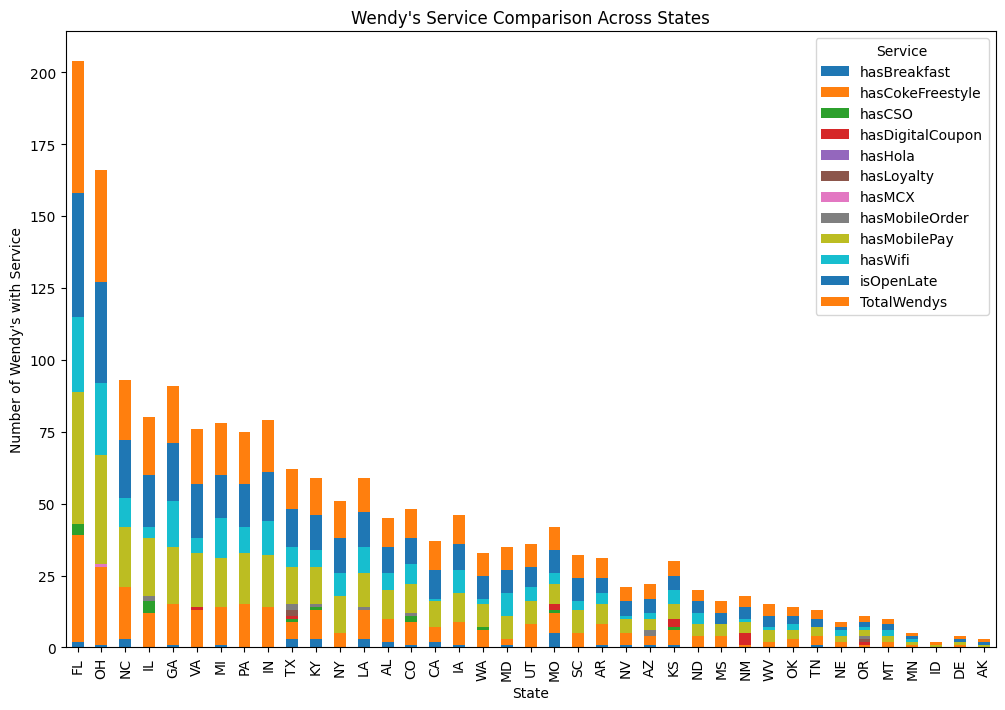

In [ ]:
grouped_data['TotalWendys'] = wendy_combine.groupby('province')['id'].count()
grouped_data = grouped_data.sort_values(by='TotalWendys', ascending=False)
grouped_data.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Wendy\'s Service Comparison Across States')
plt.xlabel('State')
plt.ylabel('Number of Wendy\'s with Service')
plt.legend(title='Service')
plt.show()